In [18]:
# import data
import pandas as pd
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

# EKF Estimated

In [31]:
def generate_flightpath_3D(log_id):
    ekf = pd.read_csv(f'converted-data/{log_id}/{log_id}-XKF1.csv')
    fig = px.line_3d(
    ekf,
    x='PE',
    y='PN',
    z=ekf['PD']*-1,
    title=f'3D flight path for log {log_id}',
    )
    return fig

log_ids = [os.path.basename(x) for x in glob('converted-data/*')]

for log_id in tqdm(log_ids):
    fig = generate_flightpath_3D(log_id)
    fig.write_html(f'visualizations/{log_id}-3D.html')

100%|██████████| 102/102 [00:02<00:00, 36.02it/s]


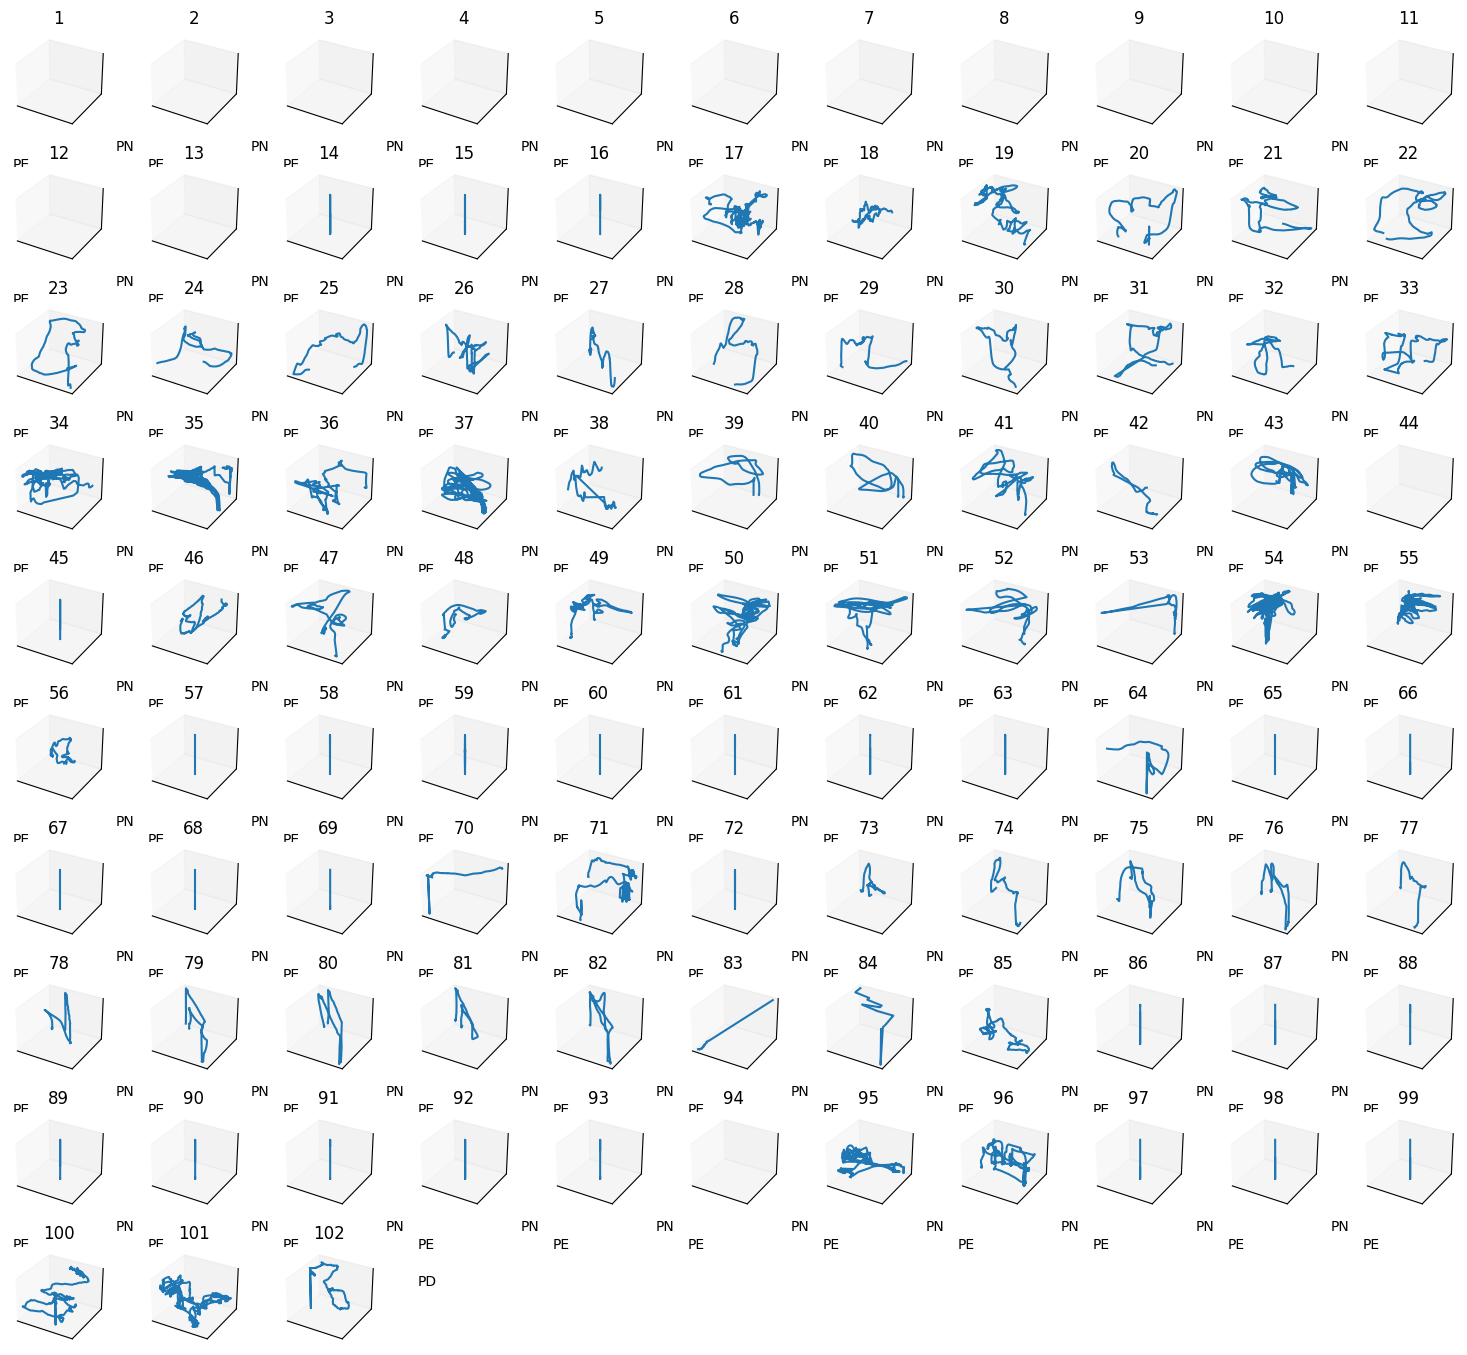

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from glob import glob

def plot_flightpath_3D(log_id, ax):
    ekf = pd.read_csv(f'converted-data/{log_id}/{log_id}-XKF1.csv')
    ax.plot(ekf['PE'], ekf['PN'], ekf['PD']*-1)
    ax.set_title(log_id)
    ax.set_xlabel('PE')
    ax.set_ylabel('PN')
    ax.set_zlabel('PD')
    # remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
# Fetching all log_ids
log_ids = sorted([int(os.path.basename(x)) for x in glob('converted-data/*')])

# Decide the grid layout (for instance, a 3x3 grid)
grid_size = int(len(log_ids) ** 0.5) + 1

fig = plt.figure(figsize=(15, 15))

for idx, log_id in enumerate(log_ids, start=1):
    ax = fig.add_subplot(grid_size, grid_size, idx, projection='3d')
    plot_flightpath_3D(log_id, ax)


plt.savefig('visualizations/flightpath-3D.png', dpi=300)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
